In [1]:
import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date
import seaborn as sns
import random 
import warnings
import operator
warnings.filterwarnings("ignore")

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [3]:
schl_df = pd.read_csv("2016 School Explorer.csv")
reg_df = pd.read_csv("D5 SHSAT Registrations and Testers.csv")

In [4]:
class data_chart():
    """ 
    Class to visualize data features
    """
    def __init__(self, df, column_name, data_type):
        """
        Initialize class
            data_type: 'cat' or 'value'
        """
        self.column_name = column_name
        self.column_data = df[column_name]
        if data_type == 'cat':
            self.cat_data()
        elif data_type == 'value':
            self.value_data()
        else:
            raise NotImplementedError
        self.data_type = data_type
        
    def cat_data(self):
        nlst, clst = [], []
        cdict = self.column_data.value_counts().to_dict()
        cdict = sorted(cdict.items(), key=operator.itemgetter(1))
        for tup in cdict:
            nlst.append(tup[0])
            clst.append(tup[1])
        self.nlst = nlst
        self.clst = clst
        
    def value_data(self):
        self.values = self.column_data
        
    def plot(self, **kwargs):
        """
        Visualize data
        """
        if self.data_type == 'cat':
            data = {"y": self.nlst, "x": self.clst, "width": 0.9, "opacity": 0.6, "orientation": 'h', "type": 'bar'}
            data['hovertext'] = list(map(lambda i: f'{i/sum(self.clst)*100:.2f}%', self.clst))
        elif self.data_type == 'value':
            data = {"x" :self.values, "name": self.column_name, "type": 'histogram'}
    
        layout = {"title": self.column_name, "autosize": True,
                  "paper_bgcolor":'rgb(243, 243, 243)', "plot_bgcolor":'rgb(243, 243, 243)'}
    
        if 'data' in kwargs:
            for k in kwargs['data']:
                data[k] = kwargs['data'][k]
            
        if 'layout' in kwargs:
            for k in kwargs['layout']:
                layout[k] = kwargs['layout'][k]
        
        fig = {"data": [data], "layout": layout}

        py.iplot(fig, filename=f'plot_of_{self.column_name}')

<h2>School City</h2>
Lets have a look at the distribution of schools in the cities given in the database.

In [5]:
school_city = data_chart(schl_df, 'City', 'cat')
margin = go.Margin(l=250, r=50, b=100, t=100, pad=20)
school_city.plot(**{'layout':{'margin': margin, 'height':800}})

Well, According to the above charts, Most of the Schools are from Brooklyn(32.3%), followed by Bronx(23.3%), New York(18.2%), Staten Island(4.72%), Jamaica(2.52%)

<h2>School Income Estimate</h2>
Let's have a look at how much estimated income do the schools have and how are they distributed. The column is contains string values so, need to change it to float values and plot some more charts.

In [6]:
def get_dollar_amount(x):
    x = str(x)
    if x == 'nan':
        return np.nan
    else:
        return float(x.strip().replace('$', '').replace(',',''))
    
schl_df['School Income Estimate'] = schl_df['School Income Estimate'].apply(get_dollar_amount)

In [7]:
school_sie = data_chart(schl_df, 'School Income Estimate', 'value')
max_v = schl_df['School Income Estimate'].max()
school_sie.plot(**{'data':{'xbins': dict(start=0, end=max_v, size=2000)}})

Most of the colleges have income from 25k to 45k, There are a few colleges with extremely high incomes like 140k and 180k, Would like to check if they are Community colleges or not. 

<h2>Community College or Not</h2>
How many colleges from the given dataset are Community colleges?

In [8]:
sch_cmnty = data_chart(schl_df, 'Community School?', 'cat')
sch_cmnty.plot()

Out of the given 1272 colleges, only 76 of them are Community colleges.

<h2>High Grade</h2>
Let's see the highest grade offered by the Schools.

In [9]:
high_grd = data_chart(schl_df, 'Grade High', 'cat')
x = list(map(lambda x: f'Grade {x}', high_grd.nlst))
y = high_grd.clst
high_grd.plot(**{'data': {'x': x, 'y': y, 'orientation': 'v', 'width': 0.5},
                 'layout': {'width': 600, 'xaxis': dict(tickangle=-45)}
                })

<h2>Economic Need Index</h2>
The Economic Need Index reflects the socioeconomics of the school population. It is calculated using the following formula:

Economic Need Index = (Percent Temporary Housing) + (Percent
HRA-eligible * 0.5) + (Percent Free Lunch Eligible * 0.5)

In [10]:
schl_df['Economic Need Index'].isnull().sum()

25

In [11]:
sch_eni = data_chart(schl_df, 'Economic Need Index', 'value')
sch_eni.plot()

In [12]:
Margin_common = go.Margin(
        l=450,
        r=50,
        b=100,
        t=100,
        pad=10)
marker_common = dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5,
                )
            )

<h2>Framework for Great Schools</h2>
The Framework for Great Schools sets forth six elements—Rigorous Instruction,
Collaborative Teachers, Supportive Environment, Effective School Leadership,
Strong Family-Community Ties, and Trust—that drive student achievement and
school improvement.

The School Quality Reports share ratings and information on how schools are
performing on the six Framework elements.

1. **Rigorous Instruction**: This section looks at whether curriculum and instruction  are designed to engage students, foster critical-thinking skills, and are aligned to the Common Core. This section draws upon data from the Quality Review and the NYC School Survey.
2. **Collaborative Teachers**: This section looks at whether teachers participate in opportunities to develop, grow, and contribute to the continuous improvement of the school community. This section draws upon data from the Quality Review and the NYC School Survey.
3. **Supportive Environment**: This section looks at whether the school establishes a culture where students feel safe, challenged to grow, and supported to meet high expectations. This section draws upon data from the Quality Review, the NYC School Survey, chronic absenteeism (or average change in student attendance, for some school types), and movement of students with disabilities to less restrictive environments.
4. **Effective School Leadership**: This section looks at whether school leadership inspires the school community with a clear instructional vision and effectively distributes leadership to realize this vision. This section draws upon data from the NYC School Survey and the Quality Review.
5. **Strong Family-Community Ties**: This section looks at whether the school forms effective partnerships with families to improve the school. This section draws NYC Department of Education 2 upon data from the NYC School Survey and the Quality Review.
6. **Trust**: This section looks at whether relationships between administrators, educators, students, and families are based on trust and respect. This section draws upon data from the NYC School Survey.

Reference : http://schools.nyc.gov/NR/rdonlyres/BC3EADE6-7F28-4E9E-BAED-37A0F0A0F0DF/0/201617EducatorGuideEC10232017.pdf

In [24]:
def rating_data(column_name):
    column_name += ' Rating'
    print(column_name)
    dct = schl_df[column_name].value_counts().to_dict()
    return go.Bar(
                y = list(dct.values()),
                x = list(dct.keys()),
                width = 0.9,
                opacity = 0.6, 
                orientation = 'v', 
                name = column_name,
                marker = dict(color='rgb(158,202,225)', line=dict(color='rgb(8,48,107)', width=1.5))
            )

def ratio_data(column_name):
    column_name += ' %'
    return go.Histogram(x = schl_df[column_name], name = column_name)

In [25]:
cols = ['Rigorous Instruction', 'Collaborative Teachers', 'Supportive Environment',
        'Effective School Leadership', 'Strong Family-Community Ties', 'Trust']

In [26]:
st = []
for c in cols:
    st.append(f'{c} Rating')
    st.append(f'{c} %')
st = tuple(st)

fig = tls.make_subplots(rows=6, cols=2, subplot_titles=st)

i = 1
for c in cols:
    fig.append_trace(rating_data(c), i, 1);
    fig.append_trace(ratio_data(c), i, 2);
    i += 1

fig['layout'].update(height=2400,title='School Quality Report Charts', showlegend=False, paper_bgcolor='rgb(243, 243, 243)',plot_bgcolor='rgb(243, 243, 243)');
py.iplot(fig, filename='simple-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]  
[ (2,1) x3,y3 ]    [ (2,2) x4,y4 ]  
[ (3,1) x5,y5 ]    [ (3,2) x6,y6 ]  
[ (4,1) x7,y7 ]    [ (4,2) x8,y8 ]  
[ (5,1) x9,y9 ]    [ (5,2) x10,y10 ]
[ (6,1) x11,y11 ]  [ (6,2) x12,y12 ]

Rigorous Instruction Rating
Collaborative Teachers Rating
Supportive Environment Rating
Effective School Leadership Rating
Strong Family-Community Ties Rating
Trust Rating


In [19]:
fig = tls.make_subplots(rows=6, cols=2, subplot_titles=('Rigorous Instruction Rating', 'Rigorous Instruction %',
                                                        'Collaborative Teachers Rating', 'Collaborative Teachers %',
                                                        'Supportive Environment Rating', 'Supportive Environment %',
                                                       'Effective School Leadership Rating', 'Effective School Leadership %',
                                                        'Strong Family-Community Ties Rating', 'Strong Family-Community Ties %',
                                                       'Trust Rating', 'Trust %'));

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]  
[ (2,1) x3,y3 ]    [ (2,2) x4,y4 ]  
[ (3,1) x5,y5 ]    [ (3,2) x6,y6 ]  
[ (4,1) x7,y7 ]    [ (4,2) x8,y8 ]  
[ (5,1) x9,y9 ]    [ (5,2) x10,y10 ]
[ (6,1) x11,y11 ]  [ (6,2) x12,y12 ]



In [27]:
rir = schl_df['Rigorous Instruction Rating'].value_counts().to_dict()
rir_bar = go.Bar(
            y= list(rir.values()),
            x = list(rir.keys()),
            width = 0.9,
            opacity=0.6, 
            orientation = 'v',
            name = 'Rigorous Instruction Rating',
            marker= marker_common
        )

rir2_hist = go.Histogram(
    x = schl_df['Rigorous Instruction %'],
    name = 'Rigorous Instruction %'
)


ctr = schl_df['Collaborative Teachers Rating'].value_counts().to_dict()
ctr_bar = go.Bar(
            y= list(ctr.values()),
            x = list(ctr.keys()),
            width = 0.9,
            opacity=0.6, 
            orientation = 'v',
            name = 'Collaborative Teachers Rating',
            marker= marker_common
        )

ctr2_hist = go.Histogram(
    x = schl_df['Collaborative Teachers %'],
    name = 'Collaborative Teachers %'
)


ser = schl_df['Supportive Environment Rating'].value_counts().to_dict()
ser_bar = go.Bar(
            y= list(rir.values()),
            x = list(rir.keys()),
            width = 0.9,
            opacity=0.6, 
            orientation = 'v',
            name = 'Supportive Environment Rating',
            marker= marker_common
        )

ser2_hist = go.Histogram(
    x = schl_df['Supportive Environment %'],
    name = 'Supportive Environment %'
)


eslr = schl_df['Effective School Leadership Rating'].value_counts().to_dict()
eslr_bar = go.Bar(
            y= list(eslr.values()),
            x = list(eslr.keys()),
            width = 0.9,
            opacity=0.6, 
            orientation = 'v',
            name = 'Effective School Leadership Rating',
            marker= marker_common
        )

eslr2_hist = go.Histogram(
    x = schl_df['Effective School Leadership %'],
    name = 'Effective School Leadership %'
)


sfct = schl_df['Strong Family-Community Ties Rating'].value_counts().to_dict()
sfct_bar = go.Bar(
            y= list(sfct.values()),
            x = list(sfct.keys()),
            width = 0.9,
            opacity=0.6, 
            orientation = 'v',
            name = 'Strong Family-Community Rating',
            marker= marker_common
        )

sfct2_hist = go.Histogram(
    x = schl_df['Strong Family-Community Ties %'],
    name = 'Strong Family-Community Ties %'
)


tr = schl_df['Trust Rating'].value_counts().to_dict()
tr_bar = go.Bar(
            y= list(tr.values()),
            x = list(tr.keys()),
            width = 0.9,
            opacity=0.6, 
            orientation = 'v',
            name = 'Trust Rating',
            marker= marker_common
        )

tr2_hist = go.Histogram(
    x = schl_df['Trust %'],
    name = 'Trust %'
)


fig = tls.make_subplots(rows=6, cols=2, subplot_titles=('Rigorous Instruction Rating', 'Rigorous Instruction %',
                                                        'Collaborative Teachers Rating', 'Collaborative Teachers %',
                                                        'Supportive Environment Rating', 'Supportive Environment %',
                                                       'Effective School Leadership Rating', 'Effective School Leadership %',
                                                        'Strong Family-Community Ties Rating', 'Strong Family-Community Ties %',
                                                       'Trust Rating', 'Trust %'));
fig.append_trace(rir_bar, 1, 1);
fig.append_trace(rir2_hist, 1, 2);
fig.append_trace(ctr_bar, 2, 1);
fig.append_trace(ctr2_hist, 2, 2);
fig.append_trace(ser_bar, 3, 1);
fig.append_trace(ser2_hist, 3, 2);
fig.append_trace(eslr_bar, 4, 1);
fig.append_trace(eslr2_hist, 4, 2);
fig.append_trace(sfct_bar, 5, 1);
fig.append_trace(sfct2_hist, 5, 2);
fig.append_trace(tr_bar, 6, 1);
fig.append_trace(tr2_hist, 6, 2);

fig['layout'].update(height=2400,title='School Quality Report Charts', showlegend=False, paper_bgcolor='rgb(243, 243, 243)',plot_bgcolor='rgb(243, 243, 243)');
py.iplot(fig, filename='simple-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]  
[ (2,1) x3,y3 ]    [ (2,2) x4,y4 ]  
[ (3,1) x5,y5 ]    [ (3,2) x6,y6 ]  
[ (4,1) x7,y7 ]    [ (4,2) x8,y8 ]  
[ (5,1) x9,y9 ]    [ (5,2) x10,y10 ]
[ (6,1) x11,y11 ]  [ (6,2) x12,y12 ]



<h2>Student Achievement Rating</h2>

In [12]:
SAR = schl_df['Student Achievement Rating'].value_counts().to_dict()

fig2 = {
  "data": [
    {
      "values": list(SAR.values()),
      "labels": list(SAR.keys()),
      "hoverinfo":"label+percent",
      "hole": .3,
      "type": "pie"
    }],
  "layout": {
        "title":"Student Achievement Rating"
        ,"paper_bgcolor":'rgb(243, 243, 243)',"plot_bgcolor":'rgb(243, 243, 243)'
    }
}
py.iplot(fig2, filename='School-City-Pie')


<h2>Average Math and ELA Proficiency</h2>
Understanding Proficiency provides resources that guide educators in analyzing student work on performance tasks in order to develop a deeper understanding of the Maths/English Language Arts (ELA)/Literacy Common Core State Standards

In [13]:
amp_hist = go.Histogram(
    x = schl_df['Average Math Proficiency'],
    name = 'Average Math Proficiency'
)

aep_hist = go.Histogram(
    x = schl_df['Average ELA Proficiency'],
    name = 'Average ELA Proficiency'
)
print("Average Math Proficiency is : " + str(np.mean(schl_df['Average Math Proficiency'])))
print("Average ELA Proficiency is : " + str(np.mean(schl_df['Average ELA Proficiency'])))
fig = tls.make_subplots(rows=1, cols=2, subplot_titles=('Average-Math-Proficiency-Histogram', 'Average ELA Proficiency'));
fig.append_trace(amp_hist, 1, 1);
fig.append_trace(aep_hist, 1, 2);

fig['layout'].update(height=400,title='Average Proficiency Plot', showlegend=False,paper_bgcolor='rgb(243, 243, 243)',plot_bgcolor='rgb(243, 243, 243)');
py.iplot(fig, filename='Proficiency-subplot')

Average Math Proficiency is : 2.668956450287592
Average ELA Proficiency is : 2.5342152834839773
This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



<h2>Students Chronically Absent</h2>

In [14]:
PCA_hist = go.Histogram(
    x = schl_df['Percent of Students Chronically Absent'],
    name = 'Percent of Students Chronically Absent'
)

dat = [PCA_hist]

layout = go.Layout(
    title='Percent of Students Chronically Absent Histogram',paper_bgcolor='rgb(243, 243, 243)',plot_bgcolor='rgb(243, 243, 243)'
)

fig = go.Figure(data=dat, layout = layout)
py.iplot(fig, filename='Percent-of-Students-Chronically-Absent-Hist')

In [15]:
def p2f(x):
    return float(x.strip('%'))/100

schl_df['Percent Asian'] = schl_df['Percent Asian'].apply(p2f)
schl_df['Percent Black'] = schl_df['Percent Black'].apply(p2f)
schl_df['Percent Hispanic'] = schl_df['Percent Hispanic'].apply(p2f)
schl_df['Percent White'] = schl_df['Percent White'].apply(p2f)
schl_df['Percent Black / Hispanic'] = schl_df['Percent Black / Hispanic'].apply(p2f)
schl_df['Percent ELL'] = schl_df['Percent ELL'].apply(p2f)

In [16]:
d3 = pd.DataFrame(schl_df.groupby(['City']).mean())
d3[['Economic Need Index','School Income Estimate','Percent Asian','Percent Black','Percent Hispanic','Percent Black / Hispanic','Percent White']]
#d3.head(25)

,Economic Need Index,School Income Estimate,Percent Asian,Percent Black,Percent Hispanic,Percent Black / Hispanic,Percent White
City,,,,,,,
ARVERNE,0.784500,44016.675000,0.025000,0.705000,0.210000,0.915000,0.025000
ASTORIA,0.512833,57263.502000,0.245000,0.053333,0.353333,0.406667,0.315000
BAYSIDE,0.276308,73019.988000,0.545385,0.040000,0.166923,0.205385,0.231538
BELLEROSE,0.267250,77483.010000,0.375000,0.270000,0.182500,0.450000,0.147500
BROAD CHANNEL,0.304000,67021.510000,0.000000,0.020000,0.150000,0.170000,0.830000
BRONX,0.814729,32417.241852,0.030808,0.294141,0.630370,0.925017,0.033098
BROOKLYN,0.704429,44997.825845,0.099392,0.459903,0.293844,0.753358,0.129586
CAMBRIA HEIGHTS,0.430000,79015.435000,0.030000,0.880000,0.025000,0.910000,0.005000
COLLEGE POINT,0.517500,58435.355000,0.300000,0.020000,0.540000,0.555000,0.135000


<h2>Latitude and Longitude</h2>
Let's Have a look at the distribution of locations using jointplot

<Figure size 864x864 with 0 Axes>

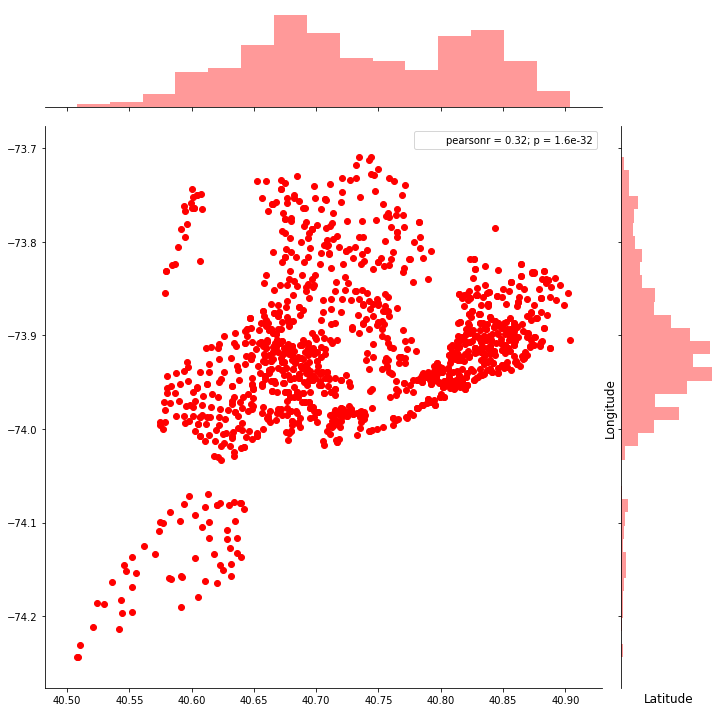

In [82]:
plt.figure(figsize=(12,12))
sns.jointplot(x=schl_df.Latitude.values, y=schl_df.Longitude.values, size=10, color = 'red')
#sns.swarmplot(x="Latitude", y="Longitude", hue="Percent Asian" data=schl_df)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

<h2>Geospatial Analysis of the Asian Percentage in NYC Schools</h2>

Red means less Precentage and Blue means more Percentage

In [83]:
import folium
from folium import plugins
from io import StringIO
import folium 

#colors = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, 12)]
colors = ['red', 'yellow', 'dusty purple', 'blue']
d = (schl_df['Percent Asian']*100).astype('int')
cols = [colors[int(i/25)] for i in d]

map_osm2 = folium.Map([schl_df['Latitude'][0], schl_df['Longitude'][0]], zoom_start=10.2,tiles='cartodbdark_matter')

for lat, long, col in zip(schl_df['Latitude'], schl_df['Longitude'], cols):
    #rown = list(rown)
    folium.CircleMarker([lat, long], color=col, fill=True, radius=2).add_to(map_osm2)

map_osm2

ValueError: invalid literal for int() with base 10: '5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5%5

<h2>Geospatial Analysis of the ELL Percentage in NYC Schools</h2>

In [84]:
d1 = (schl_df['Percent ELL']*100).astype('int')
cols = [colors[int(i/25)] for i in d1]

map_osm2 = folium.Map([schl_df['Latitude'][0], schl_df['Longitude'][0]], zoom_start=10.2,tiles='cartodbdark_matter')

for lat, long, col in zip(schl_df['Latitude'], schl_df['Longitude'], cols):
    folium.CircleMarker([lat, long], color=col, fill=True, radius=2).add_to(map_osm2)

map_osm2

ValueError: invalid literal for int() with base 10: '9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9%9

<h2>Geospatial Analysis of the Black Percentage in NYC Schools</h2>

In [20]:
d3 = (schl_df['Percent Black']*100).astype('int')
cols = [colors[int(i/25)] for i in d1]

map_osm2 = folium.Map([schl_df['Latitude'][0], schl_df['Longitude'][0]], zoom_start=10.2,tiles='cartodbdark_matter')

for lat, long, col in zip(schl_df['Latitude'], schl_df['Longitude'], cols):
    folium.CircleMarker([lat, long], color=col, fill=True, radius=2).add_to(map_osm2)

map_osm2

<h2>Geospatial Analysis of the Hispanic Percentage in NYC Schools</h2>

In [21]:
d3 = (schl_df['Percent Hispanic']*100).astype('int')
cols = [colors[int(i/25)] for i in d1]

map_osm2 = folium.Map([schl_df['Latitude'][0], schl_df['Longitude'][0]], zoom_start=10.2,tiles='cartodbdark_matter')

for lat, long, col in zip(schl_df['Latitude'], schl_df['Longitude'], cols):
    folium.CircleMarker([lat, long], color=col, fill=True, radius=2).add_to(map_osm2)

map_osm2

<h2>Geospatial Analysis of the White Percentage in NYC Schools</h2>

In [22]:
d3 = (schl_df['Percent White']*100).astype('int')
cols = [colors[int(i/25)] for i in d1]

map_osm2 = folium.Map([schl_df['Latitude'][0], schl_df['Longitude'][0]], zoom_start=10.2,tiles='cartodbdark_matter')

for lat, long, col in zip(schl_df['Latitude'], schl_df['Longitude'], cols):
    folium.CircleMarker([lat, long], color=col, fill=True, radius=2).add_to(map_osm2)

map_osm2

In [23]:
schl_df.head(10)

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,310100010034,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",...,48,1,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,310100010063,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
5,NaN,NaN,NaN,P.S. 064 ROBERT SIMON,310100010064,01M064,1,40.723747,-73.981602,"600 E 6TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
6,NaN,NaN,NaN,P.S. 110 FLORENCE NIGHTINGALE,310100010110,01M110,1,40.715293,-73.979927,"285 DELANCEY ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
7,NaN,NaN,NaN,P.S. 134 HENRIETTA SZOLD,310100010134,01M134,1,40.714301,-73.982966,"293 E BROADWAY NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
8,NaN,NaN,NaN,P.S. 140 NATHAN STRAUS,310100010140,01M140,1,40.719128,-73.983283,"123 RIDGE ST NEW YORK, NY 10002",...,61,2,0,0,1,0,0,0,0,1
9,NaN,NaN,NaN,P.S. 142 AMALIA CASTRO,310100010142,01M142,1,40.718230,-73.984082,"100 ATTORNEY ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0


<h2>Scores for ELA and Maths from Grade 3 to Grade 8</h2>
**Numeric Grade Scores** : Report Cards Give Up A’s and B’s for 4s and 3s. The lowest mark, 1, indicates a student is not meeting New York State’s academic standards, while the top grade of 4 celebrates “meeting standards with distinction.”

Below plots are bubble charts for the Number of students getting 4 Scores in Grades 3 to 8.  

In [24]:
# Create a trace
colors = ['hsl('+str(h)+',50%'+',50%)' for h in np.linspace(0, 360, 12)]
race = ['All Students','American Indian or Alaska Native','Black or African American',
          'Hispanic or Latino','Asian or Pacific Islander','White',
          'Multiracial','Limited English Proficient','Economically Disadvantaged']

g3_ela_count = list()
for i in race:
    g3_ela_count.append( len( schl_df['Grade 3 ELA 4s - ' + i][schl_df['Grade 3 ELA 4s - ' + i] > 0] ) )

total = np.sum(g3_ela_count)
trace0 = go.Scatter(
    x=race,
    y=g3_ela_count,
    mode='markers',
    marker=dict(
        size=[((x/total)*150) + 20 for x in g3_ela_count],
        color=colors[:len(race)],
    )
)

g3_math_count = list()
for i in race:
    g3_math_count.append( len( schl_df['Grade 3 Math 4s - ' + i][schl_df['Grade 3 Math 4s - ' + i] > 0] ) )

total2 = np.sum(g3_math_count)
trace1 = go.Scatter(
    x=race,
    y=g3_math_count,
    mode='markers',
    marker=dict(
        size=[((x/total)*150) + 20 for x in g3_math_count],
        color=colors[:len(race)],
    )
)

fig = tls.make_subplots(rows=1, cols=2, subplot_titles=('Count of Students scoring 4s in Grade 3 ELA', 'Count of Students scoring 4s in Grade 3 Math'));
fig.append_trace(trace0, 1, 1);
fig.append_trace(trace1, 1, 2);

fig['layout'].update(height=400,title='Count of Students scoring 4s in Grade 3', showlegend=False,paper_bgcolor='rgb(243, 243, 243)',plot_bgcolor='rgb(243, 243, 243)' );
py.iplot(fig, filename='Proficiency-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [25]:
#---------------------Grade 4 -----------------------------------


g4_ela_count = list()
for i in race:
    g4_ela_count.append( len( schl_df['Grade 4 ELA 4s - ' + i][schl_df['Grade 4 ELA 4s - ' + i] > 0] ) )


total = np.sum(g4_ela_count)
trace0 = go.Scatter(
    x=race,
    y=g4_ela_count,
    mode='markers',
    marker=dict(
        size=[((x/total)*150) + 20 for x in g4_ela_count],
        color=colors[:len(race)],
    )
)

g4_math_count = list()
for i in race:
    g4_math_count.append( len( schl_df['Grade 4 Math 4s - ' + i][schl_df['Grade 4 Math 4s - ' + i] > 0] ) )

total2 = np.sum(g4_math_count)
trace1 = go.Scatter(
    x=race,
    y=g4_math_count,
    mode='markers',
    marker=dict(
        size=[((x/total)*150) + 20 for x in g4_math_count],
        color=colors[:len(race)],
    )
)

fig = tls.make_subplots(rows=1, cols=2, subplot_titles=('Count of Students scoring 4s in Grade 4 ELA', 'Count of Students scoring 4s in Grade 4 Math'));
fig.append_trace(trace0, 1, 1);
fig.append_trace(trace1, 1, 2);

fig['layout'].update(height=400,title='Count of Students scoring 4s in Grade 4', showlegend=False, paper_bgcolor='rgb(243, 243, 243)',plot_bgcolor='rgb(243, 243, 243)');
py.iplot(fig, filename='Proficiency-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [26]:
#---------------------- Grade 5 --------------------------------------

g5_ela_count = list()
for i in race:
    g5_ela_count.append( len( schl_df['Grade 5 ELA 4s - ' + i][schl_df['Grade 5 ELA 4s - ' + i] > 0] ) )


total = np.sum(g5_ela_count)
trace0 = go.Scatter(
    x=race,
    y=g5_ela_count,
    mode='markers',
    marker=dict(
        size=[((x/total)*150) + 20 for x in g5_ela_count],
        color=colors[:len(race)],
    )
)

g5_math_count = list()
for i in race:
    g5_math_count.append( len( schl_df['Grade 5 Math 4s - ' + i][schl_df['Grade 5 Math 4s - ' + i] > 0] ) )

total2 = np.sum(g5_math_count)
trace1 = go.Scatter(
    x=race,
    y=g5_math_count,
    mode='markers',
    marker=dict(
        size=[((x/total2)*150) + 20 for x in g5_math_count],
        color=colors[:len(race)],
    )
)

fig = tls.make_subplots(rows=1, cols=2, subplot_titles=('Count of Students scoring 4s in Grade 5 ELA', 'Count of Students scoring 4s in Grade 5 Math'));
fig.append_trace(trace0, 1, 1);
fig.append_trace(trace1, 1, 2);

fig['layout'].update(height=400,title='Count of Students scoring 4s in Grade 5', showlegend=False, paper_bgcolor='rgb(243, 243, 243)',plot_bgcolor='rgb(243, 243, 243)');
py.iplot(fig, filename='Proficiency-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [27]:
# ---------------- Grade 6 ---------------------------


g6_ela_count = list()
for i in race:
    g6_ela_count.append( len( schl_df['Grade 6 ELA 4s - ' + i][schl_df['Grade 6 ELA 4s - ' + i] > 0] ) )


total = np.sum(g6_ela_count)
trace0 = go.Scatter(
    x=race,
    y=g6_ela_count,
    mode='markers',
    marker=dict(
        size=[((x/total)*150) + 20 for x in g6_ela_count],
        color=colors[:len(race)],
    )
)

g6_math_count = list()
for i in race:
    g6_math_count.append( len( schl_df['Grade 6 Math 4s - ' + i][schl_df['Grade 6 Math 4s - ' + i] > 0] ) )

total2 = np.sum(g6_math_count)
trace1 = go.Scatter(
    x=race,
    y=g6_math_count,
    mode='markers',
    marker=dict(
        size=[((x/total2)*150) + 20 for x in g6_math_count],
        color=colors[:len(race)],
    )
)


fig = tls.make_subplots(rows=1, cols=2, subplot_titles=('Count of Students scoring 4s in Grade 6 ELA', 'Count of Students scoring 4s in Grade 6 Math'));
fig.append_trace(trace0, 1, 1);
fig.append_trace(trace1, 1, 2);

fig['layout'].update(height=400,title='Count of Students scoring 4s in Grade 6', showlegend=False, paper_bgcolor='rgb(243, 243, 243)',plot_bgcolor='rgb(243, 243, 243)');
py.iplot(fig, filename='Proficiency-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [28]:
# -------------------------- Grade 7 ---------------------------

g7_ela_count = list()
for i in race:
    g7_ela_count.append( len( schl_df['Grade 7 ELA 4s - ' + i][schl_df['Grade 7 ELA 4s - ' + i] > 0] ) )

total = np.sum(g7_ela_count)
trace0 = go.Scatter(
    x=race,
    y=g7_ela_count,
    mode='markers',
    marker=dict(
        size=[((x/total)*150) + 20 for x in g7_ela_count],
        color=colors[:len(race)],
    )
)

g7_math_count = list()
for i in race:
    g7_math_count.append( len( schl_df['Grade 7 Math 4s - ' + i][schl_df['Grade 7 Math 4s - ' + i] > 0] ) )

total2 = np.sum(g7_math_count)
trace1 = go.Scatter(
    x=race,
    y=g7_math_count,
    mode='markers',
    marker=dict(
        size=[((x/total2)*150) + 20 for x in g7_math_count],
        color=colors[:len(race)],
    )
)


fig = tls.make_subplots(rows=1, cols=2, subplot_titles=('Count of Students scoring 4s in Grade 7 ELA', 'Count of Students scoring 4s in Grade 7 Math'));
fig.append_trace(trace0, 1, 1);
fig.append_trace(trace1, 1, 2);

fig['layout'].update(height=400,title='Count of Students scoring 4s in Grade 7', showlegend=False, paper_bgcolor='rgb(243, 243, 243)',plot_bgcolor='rgb(243, 243, 243)');
py.iplot(fig, filename='Proficiency-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [29]:
#------------------------- Grade 8 -----------------------------

g8_ela_count = list()
for i in race:
    g8_ela_count.append( len( schl_df['Grade 8 ELA 4s - ' + i][schl_df['Grade 8 ELA 4s - ' + i] > 0] ) )

total = np.sum(g8_ela_count)
trace0 = go.Scatter(
    x=race,
    y=g8_ela_count,
    mode='markers',
    marker=dict(
        size=[((x/total)*150) + 20 for x in g8_ela_count],
        color=colors[:len(race)],
    )
)

g8_math_count = list()
for i in race:
    g8_math_count.append( len( schl_df['Grade 8 Math 4s - ' + i][schl_df['Grade 8 Math 4s - ' + i] > 0] ) )

total2 = np.sum(g8_math_count)
trace1 = go.Scatter(
    x=race,
    y=g8_math_count,
    mode='markers',
    marker=dict(
        size=[((x/total2)*150) + 20 for x in g8_math_count],
        color=colors[:len(race)],
        
    )
)

fig = tls.make_subplots(rows=1, cols=2, subplot_titles=('Count of Students scoring 4s in Grade 8 ELA', 'Count of Students scoring 4s in Grade 8 Math'));
fig.append_trace(trace0, 1, 1);
fig.append_trace(trace1, 1, 2);

fig['layout'].update(height=400,title='Count of Students scoring 4s in Grade 8', showlegend=False, paper_bgcolor='rgb(243, 243, 243)',plot_bgcolor='rgb(243, 243, 243)');
py.iplot(fig, filename='Proficiency-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



<h2>2016 School Explorer</h2>
Lets have a look at the second csv file given to us and explore it a bit. 

<h2>Number of students who registered for the SHSAT</h2>


In [30]:
d4 = reg_df[reg_df['Year of SHST'] == 2013]
d4 = pd.DataFrame(d4.groupby(['School name']).sum()).reset_index()
d5 = reg_df[reg_df['Year of SHST'] == 2014]
d5 = pd.DataFrame(d5.groupby(['School name']).sum()).reset_index()
d6 = reg_df[reg_df['Year of SHST'] == 2015]
d6 = pd.DataFrame(d6.groupby(['School name']).sum()).reset_index()
d7 = reg_df[reg_df['Year of SHST'] == 2016]
d7 = pd.DataFrame(d7.groupby(['School name']).sum()).reset_index()

d4['Number of students who did not take the SHSAT after registering'] = d4['Number of students who registered for the SHSAT'] - d4['Number of students who took the SHSAT']
d5['Number of students who did not take the SHSAT after registering'] = d5['Number of students who registered for the SHSAT'] - d5['Number of students who took the SHSAT']
d6['Number of students who did not take the SHSAT after registering'] = d6['Number of students who registered for the SHSAT'] - d6['Number of students who took the SHSAT']
d7['Number of students who did not take the SHSAT after registering'] = d7['Number of students who registered for the SHSAT'] - d7['Number of students who took the SHSAT']

In [31]:

trace1 = go.Bar(
    y=reg_df['School name'],
    x=reg_df['Number of students who registered for the SHSAT'],
    name='Number of students who registered for the SHSAT',
    orientation = 'h'
)
trace2 = go.Bar(
    y=reg_df['School name'],
    x=reg_df['Number of students who took the SHSAT'],
    name='Number of students who took the SHSAT',
    orientation = 'h'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='stack',
    showlegend = False,
    margin=go.Margin(
        l=350,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    height = 800,
    
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')


<h2>Number of students who registered for the SHSAT</h2>
Lets have a look at the percentage of students who registered and took the SHSAT.

In [32]:
label_common = ['Number of students who did not take the SHSAT after registering', 'Number of students who took the SHSAT']

values_13 = [np.sum(d4['Number of students who did not take the SHSAT after registering']), np.sum(d4['Number of students who took the SHSAT'])]
values_14 = [np.sum(d5['Number of students who did not take the SHSAT after registering']), np.sum(d5['Number of students who took the SHSAT'])]
values_15 = [np.sum(d6['Number of students who did not take the SHSAT after registering']), np.sum(d6['Number of students who took the SHSAT'])]
values_16 = [np.sum(d7['Number of students who did not take the SHSAT after registering']), np.sum(d7['Number of students who took the SHSAT'])]


labels1 = ['Number of students who registered for the SHSAT','Number of students who took the SHSAT','Number of students who did not take the SHSAT']
val_2013 = [[np.sum(d4['Number of students who registered for the SHSAT']), 
             np.sum(d4['Number of students who took the SHSAT']),
             np.sum(d4['Number of students who did not take the SHSAT after registering'])]]

val_2014 = [[np.sum(d5['Number of students who registered for the SHSAT']), 
             np.sum(d5['Number of students who took the SHSAT']),
             np.sum(d5['Number of students who did not take the SHSAT after registering'])]]

val_2015 = [[np.sum(d6['Number of students who registered for the SHSAT']), 
             np.sum(d6['Number of students who took the SHSAT']),
             np.sum(d6['Number of students who did not take the SHSAT after registering'])]]

val_2016 = [[np.sum(d7['Number of students who registered for the SHSAT']), 
             np.sum(d7['Number of students who took the SHSAT']),
             np.sum(d7['Number of students who did not take the SHSAT after registering'])]]
trace0 = go.Bar(
    y=labels1,
    x=val_2013[0],
    marker=dict(color=['blue', 'yellow','red']),
    orientation ='h'
)

trace1 = go.Bar(
    x=val_2014[0],
    y=labels1,
    marker=dict(color=['blue', 'yellow','red']),
    orientation ='h'
)
fig = tls.make_subplots(rows=2, cols=1, subplot_titles=('Number of students who registered for the SHSAT for 2013', 'Number of students who registered for the SHSAT for 2014'));
fig.append_trace(trace0, 1, 1);
fig.append_trace(trace1, 2, 1);

fig['layout'].update(title = 'Number of students who registered for the SHSAT for 2013 and 2014', height=600, showlegend=False, margin=go.Margin(
        l=350,
        r=50,
        b=100,
        t=100,
        pad=4
    ),paper_bgcolor='rgb(243, 243, 243)',plot_bgcolor='rgb(243, 243, 243)');
py.iplot(fig, filename='Proficiency-subplot')

fig = {
  "data": [
    {
      "values": values_13,
      "labels": label_common,
      "domain": {"x": [0, .48]},
      "name": "2013",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": values_14,
      "labels": label_common,
      "text":["2013"],
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "2014",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Number of students who registered for the SHSAT for 2013 and 2014",
        "showlegend": False,
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "2013",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "2014",
                "x": 0.8,
                "y": 0.5
            }
        ],
        "paper_bgcolor": 'rgb(243, 243, 243)',"plot_bgcolor":'rgb(243, 243, 243)',
    }
}
py.iplot(fig, filename='donut')


This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [33]:
trace0 = go.Bar(
    y=labels1,
    x=val_2015[0],
    marker=dict(color=['blue', 'yellow','red']),
    orientation ='h'
)

trace1 = go.Bar(
    x=val_2016[0],
    y=labels1,
    marker=dict(color=['blue', 'yellow','red']),
    orientation ='h'
)
fig = tls.make_subplots(rows=2, cols=1, subplot_titles=('Number of students who registered for the SHSAT for 2015', 'Number of students who registered for the SHSAT for 2016'));
fig.append_trace(trace0, 1, 1);
fig.append_trace(trace1, 2, 1);

fig['layout'].update(title = 'Number of students who registered for the SHSAT', height=600, showlegend=False, margin=go.Margin(
        l=350,
        r=50,
        b=100,
        t=100,
        pad=4
    ),paper_bgcolor='rgb(243, 243, 243)',plot_bgcolor='rgb(243, 243, 243)');
py.iplot(fig, filename='Proficiency-subplot')

fig = {
  "data": [
    {
      "values": values_15,
      "labels": label_common,
      "domain": {"x": [0, .48]},
      "name": "2015",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": values_16,
      "labels": label_common,
      "text":["2016"],
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "2016",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Number of students who registered for the SHSAT for 2015 and 2016",
        "showlegend": False,
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "2015",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "2016",
                "x": 0.8,
                "y": 0.5
            }
        ],
      "paper_bgcolor": 'rgb(243, 243, 243)',"plot_bgcolor":'rgb(243, 243, 243)',
    }
}
py.iplot(fig, filename='donut')



This is the format of your plot grid:
[ (1,1) x1,y1 ]
[ (2,1) x2,y2 ]



In [34]:
trace1 = go.Bar(
    x=[np.sum(d4['Enrollment on 10/31']), np.sum(d5['Enrollment on 10/31']), np.sum(d6['Enrollment on 10/31']), np.sum(d7['Enrollment on 10/31'])],
    y=['2013', '2014', '2015', '2016'],
    marker=dict(color=['blue', 'yellow','red', 'orange']),
    orientation ='h'
)
data = [trace1]

layout = go.Layout(
    title = "Enrollment on 10/31 Bar Plot",
    barmode='stack',
    height = 400,
     xaxis=dict(
        title='Count',
    ),
    yaxis=dict(
        title='Year',
    ),paper_bgcolor='rgb(243, 243, 243)',plot_bgcolor='rgb(243, 243, 243)')


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='marker-h-bar')